In [1]:
import pandas as pd

In [2]:
ncpdf=pd.read_csv('Physician_Compare_National_Downloadable_File.csv')
ncpdf.head()

C:\Users\xiaoyang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (15,25,26,27,28,29,30,31,32,33,34,36,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Gender,Credential,Medical school name,...,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,Reported Quality Measures,Used electronic health records,Committed to heart health through the Million Hearts® initiative.
0,1487927612,4880850486,I20120726000331,HALL,ESTHER,S,NaN,F,NaN,LIFE CHIROPRACTIC COLLEGE - WEST,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
1,1235146762,2365435336,I20040406000367,WHITE,BARBARA,L,NaN,F,CSW,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
2,1346282258,5395768527,I20060113000139,DAVIDSON,JOHN,A,NaN,M,CSW,OTHER,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
3,1932283124,5193762862,I20050415000143,CAGEN,STEVEN,F,NaN,M,DC,SHERMAN COLLEGE OF STRAIGHT CHIROPRACTIC,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
4,1902950462,7416123666,I20120110000522,ESPY,LEISHA,H,NaN,F,NaN,LIFE CHIROPRACTIC COLLEGE,...,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN


In [3]:
ncpdf['NPI'].nunique()

1070395

In [4]:
ncpdf[ncpdf['NPI'].isnull()==True] #no null value in NPI

,NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Gender,Credential,Medical school name,...,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,Reported Quality Measures,Used electronic health records,Committed to heart health through the Million Hearts® initiative.


In [5]:
ncpdf['PAC ID'].nunique()

1070399

In [6]:
print('How many clinicians are in the dataset?:', ncpdf['NPI'].nunique())# The written mistake may happened in PAC ID, which makes the No of PAC ID is a little bit more than that of NPI.

How many clinicians are in the dataset?: 1070395


In [7]:
num_F=len(ncpdf[ncpdf['Gender']=='F'].groupby('NPI')['Gender'])

In [8]:
num_M=len(ncpdf[ncpdf['Gender']=='M'].groupby('NPI')['Gender'])


In [9]:
ratio_m2f=num_M/num_F
print('What is the ratio of male to female clinicians?:',"{0:.10f}".format(ratio_m2f))

What is the ratio of male to female clinicians?: 1.1742541194


In [10]:
ncpdf=pd.get_dummies(ncpdf,columns=['Gender'],drop_first=False)


In [11]:
ncpdf[['State','Organization legal name']].head()

,State,Organization legal name
0,CA,NaN
1,NJ,NaN
2,NY,NaN
3,NC,CAGEN FAMILY CHIROPRACTIC PLLC
4,GA,NaN


In [12]:
h_r_f_i_C=ncpdf.groupby('Credential')['Gender_F'].mean().max() 
print(' Highest ratio of female clinicians to male clinicians with a given type of credential:',"{0:.10f}".format(h_r_f_i_C))

 Highest ratio of female clinicians to male clinicians with a given type of credential: 1.0000000000


In [13]:
ncpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955262 entries, 0 to 2955261
Data columns (total 43 columns):
NPI                                                                  int64
PAC ID                                                               int64
Professional Enrollment ID                                           object
Last Name                                                            object
First Name                                                           object
Middle Name                                                          object
Suffix                                                               object
Credential                                                           object
Medical school name                                                  object
Graduation year                                                      float64
Primary specialty                                                    object
Secondary specialty 1                               

In [14]:
num_facility=len(ncpdf.groupby('State')['Organization legal name'].nunique()[ncpdf.groupby('State')['Organization legal name'].nunique()<10])

In [15]:
print ('How many states have fewer than 10 healthcare facilities in this dataset?',num_facility)

How many states have fewer than 10 healthcare facilities in this dataset? 0


In [16]:
pc2ieprps=pd.read_csv('Physician_Compare_2015_Individual_EP_Public_Reporting___Performance_Scores.csv')
pc2ieprps.head()

,NPI,PAC ID,Last Name,First Name,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Reporting Mechanism,Reported on PC Live Site
0,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_110_1,Preventive Care and Screening: Influenza Immun...,N,21,CLM,Y
1,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_111_1,Pneumonia Vaccination Status for Older Adults,N,28,CLM,Y
2,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_112_1,Breast Cancer Screening,N,37,CLM,Y
3,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_113_1,Colorectal Cancer Screening,N,22,CLM,Y
4,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_128_1,Preventive Care and Screening: Body Mass Index...,N,42,CLM,Y


In [17]:
pc2ieprps.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495417 entries, 0 to 495416
Data columns (total 10 columns):
NPI                         495417 non-null int64
PAC ID                      495417 non-null int64
Last Name                   495411 non-null object
First Name                  495417 non-null object
Measure Identifier          495417 non-null object
Measure Title               495417 non-null object
Inverse Measure             495417 non-null object
Measure Performance Rate    495417 non-null int64
Reporting Mechanism         495417 non-null object
Reported on PC Live Site    495417 non-null object
dtypes: int64(3), object(7)
memory usage: 37.8+ MB


In [18]:

pc2ieprps['NPI'].nunique()

180723

In [19]:
PR_m=pc2ieprps.groupby('NPI')['Measure Performance Rate'].mean()[pc2ieprps.groupby('NPI')['Measure Performance Rate'].count()>9]

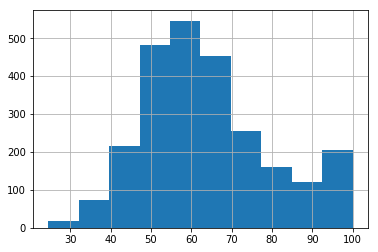

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
PR_m.hist()

In [21]:
std_PR_m=PR_m.std()

In [22]:
print('What is the standard deviation of that distribution of these average rates for individuals who have at least 10?',"{0:.10f}".format(std_PR_m))

What is the standard deviation of that distribution of these average rates for individuals who have at least 10? 15.9597540139


In [23]:
NPI_Cred=ncpdf.groupby('NPI')['Credential'].value_counts()

NPI=[i[0] for i in NPI_Cred.index]
Cre=[i[1] for i in NPI_Cred.index]

In [24]:
NPI_Cred=pd.DataFrame({'NPI':NPI, 'Credential':Cre})
NPI_Cred['NPI'].nunique()

341010

In [25]:
pc2ieprps=pd.merge(pc2ieprps,NPI_Cred,how='left', on='NPI')
pc2ieprps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495417 entries, 0 to 495416
Data columns (total 11 columns):
NPI                         495417 non-null int64
PAC ID                      495417 non-null int64
Last Name                   495411 non-null object
First Name                  495417 non-null object
Measure Identifier          495417 non-null object
Measure Title               495417 non-null object
Inverse Measure             495417 non-null object
Measure Performance Rate    495417 non-null int64
Reporting Mechanism         495417 non-null object
Reported on PC Live Site    495417 non-null object
Credential                  187012 non-null object
dtypes: int64(3), object(8)
memory usage: 45.4+ MB


In [26]:
pc2ieprps.head()

,NPI,PAC ID,Last Name,First Name,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Reporting Mechanism,Reported on PC Live Site,Credential
0,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_110_1,Preventive Care and Screening: Influenza Immun...,N,21,CLM,Y,MD
1,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_111_1,Pneumonia Vaccination Status for Older Adults,N,28,CLM,Y,MD
2,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_112_1,Breast Cancer Screening,N,37,CLM,Y,MD
3,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_113_1,Colorectal Cancer Screening,N,22,CLM,Y,MD
4,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_128_1,Preventive Care and Screening: Body Mass Index...,N,42,CLM,Y,MD


In [27]:
pc2ieprps['NPI'].nunique()

180723

In [28]:
NPI_Grady=ncpdf.groupby('NPI')['Graduation year'].value_counts()

#NPI_Cred=pd.DataFrame({'NPI':NPI_Cred.index[, 'Credential':NPI_Cred.index[1]})
NPI=[i[0] for i in NPI_Grady.index]
Grady=[i[1] for i in NPI_Grady.index]

In [29]:
NPI_Grady=pd.DataFrame({'NPI':NPI, 'Graduation year':Grady})
NPI_Grady['NPI'].nunique()

1067591

In [30]:
pc2ieprps=pd.merge(pc2ieprps,NPI_Grady,how='left', on='NPI')
pc2ieprps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495417 entries, 0 to 495416
Data columns (total 12 columns):
NPI                         495417 non-null int64
PAC ID                      495417 non-null int64
Last Name                   495411 non-null object
First Name                  495417 non-null object
Measure Identifier          495417 non-null object
Measure Title               495417 non-null object
Inverse Measure             495417 non-null object
Measure Performance Rate    495417 non-null int64
Reporting Mechanism         495417 non-null object
Reported on PC Live Site    495417 non-null object
Credential                  187012 non-null object
Graduation year             473535 non-null float64
dtypes: float64(1), int64(3), object(8)
memory usage: 49.1+ MB


In [31]:
pc2ieprps.head()

,NPI,PAC ID,Last Name,First Name,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Reporting Mechanism,Reported on PC Live Site,Credential,Graduation year
0,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_110_1,Preventive Care and Screening: Influenza Immun...,N,21,CLM,Y,MD,1996.0
1,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_111_1,Pneumonia Vaccination Status for Older Adults,N,28,CLM,Y,MD,1996.0
2,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_112_1,Breast Cancer Screening,N,37,CLM,Y,MD,1996.0
3,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_113_1,Colorectal Cancer Screening,N,22,CLM,Y,MD,1996.0
4,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_128_1,Preventive Care and Screening: Body Mass Index...,N,42,CLM,Y,MD,1996.0


In [42]:
pc2ieprps_7306=pc2ieprps[(pc2ieprps['Graduation year']>1972) & (pc2ieprps['Graduation year']<2007) & (pc2ieprps['Credential']=='MD')]
pc2ieprps_7306.head()

,NPI,PAC ID,Last Name,First Name,Measure Identifier,Measure Title,Inverse Measure,Measure Performance Rate,Reporting Mechanism,Reported on PC Live Site,Credential,Graduation year
0,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_110_1,Preventive Care and Screening: Influenza Immun...,N,21,CLM,Y,MD,1996.0
1,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_111_1,Pneumonia Vaccination Status for Older Adults,N,28,CLM,Y,MD,1996.0
2,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_112_1,Breast Cancer Screening,N,37,CLM,Y,MD,1996.0
3,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_113_1,Colorectal Cancer Screening,N,22,CLM,Y,MD,1996.0
4,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_128_1,Preventive Care and Screening: Body Mass Index...,N,42,CLM,Y,MD,1996.0


In [43]:
PR7306_10=pc2ieprps_7306.groupby('NPI')['Measure Performance Rate'].mean()[pc2ieprps_7306.groupby('NPI')['Measure Performance Rate'].count()>9]

In [44]:
PR7306_gy=pc2ieprps_7306.groupby('NPI')['Graduation year'].mean()[pc2ieprps_7306.groupby('NPI')['Measure Performance Rate'].count()>9]

In [45]:
PR7306_gy.head()

NPI
1003800145    1982.0
1003846056    1991.0
1003874025    1998.0
1003880238    1997.0
1003893454    1994.0
Name: Graduation year, dtype: float64

In [46]:
Grady_MPrate=pd.DataFrame({'NPI':PR7306_10.index,'Measure Performance Rate':PR7306_10.values,'Graduation year':PR7306_gy.values})

In [47]:
x=Grady_MPrate['Graduation year']
y=Grady_MPrate['Measure Performance Rate']

In [48]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [49]:
print('the p-value of the linear regression is:',p_value)

the p-value of the linear regression is: 0.450972091979


In [53]:
pc2ieprps_MD=pc2ieprps[(pc2ieprps['Credential']=='MD')]
pc2ieprps_NP=pc2ieprps[(pc2ieprps['Credential']=='NP')]

In [54]:
PRMD_10=pc2ieprps_MD.groupby('NPI')['Measure Performance Rate'].mean()[pc2ieprps_MD.groupby('NPI')['Measure Performance Rate'].count()>9]

In [55]:
PRNP_10=pc2ieprps_NP.groupby('NPI')['Measure Performance Rate'].mean()[pc2ieprps_NP.groupby('NPI')['Measure Performance Rate'].count()>9]

In [56]:
PRMD_10.mean()

64.41845454838997

In [57]:
PRNP_10.mean()

56.22572296124927

In [58]:
print('the absolute difference in the average performance rates between MD and nurse practitioners NP:',abs(PRNP_10.mean()-PRMD_10.mean()))

the absolute difference in the average performance rates between MD and nurse practitioners NP: 8.192731587140706


In [59]:
result=stats.ttest_ind(PRMD_10.values,PRNP_10.values)

In [60]:
print('he p-value of the difference in MD and NP performance rates:', result[1])

he p-value of the difference in MD and NP performance rates: 0.00242413930511
